Dataset: https://www.kaggle.com/shivam2503/diamonds
In this notebook, I will try to implement machine learning model (regression) to predict the price of diamonds. This simple notebook just focus on the EDA (Exploratory Data Analysis) and simple machine learning.

### Data Description:
**price**: price in US dollars (326--18,823)

**carat**: weight of the diamond (0.2--5.01)

**cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: diamond colour, from J (worst) to D (best)

**clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**: length in mm (0--10.74)

**y**: width in mm (0--58.9)

**z**: depth in mm (0--31.8)

**depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**: width of top of diamond relative to widest point (43--95)

## 1. Data Handling

### 1.1 Import Module and Preview Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


In [4]:
df = pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### 1.2 Univariate and Bivariate Data Analysis

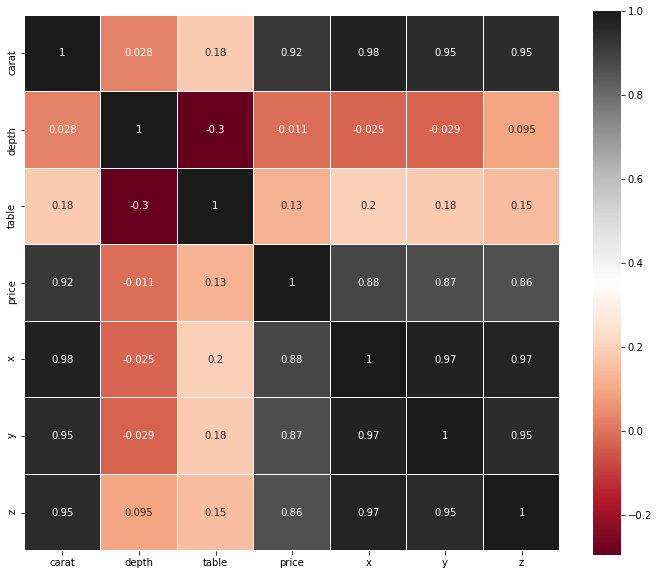

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdGy', linewidths=0.1, linecolor='white')

We can see that x, y, z, carat have strong correlation with price, while table and depth don't have. Also, table and depth don't have a significant relation with other features as well.

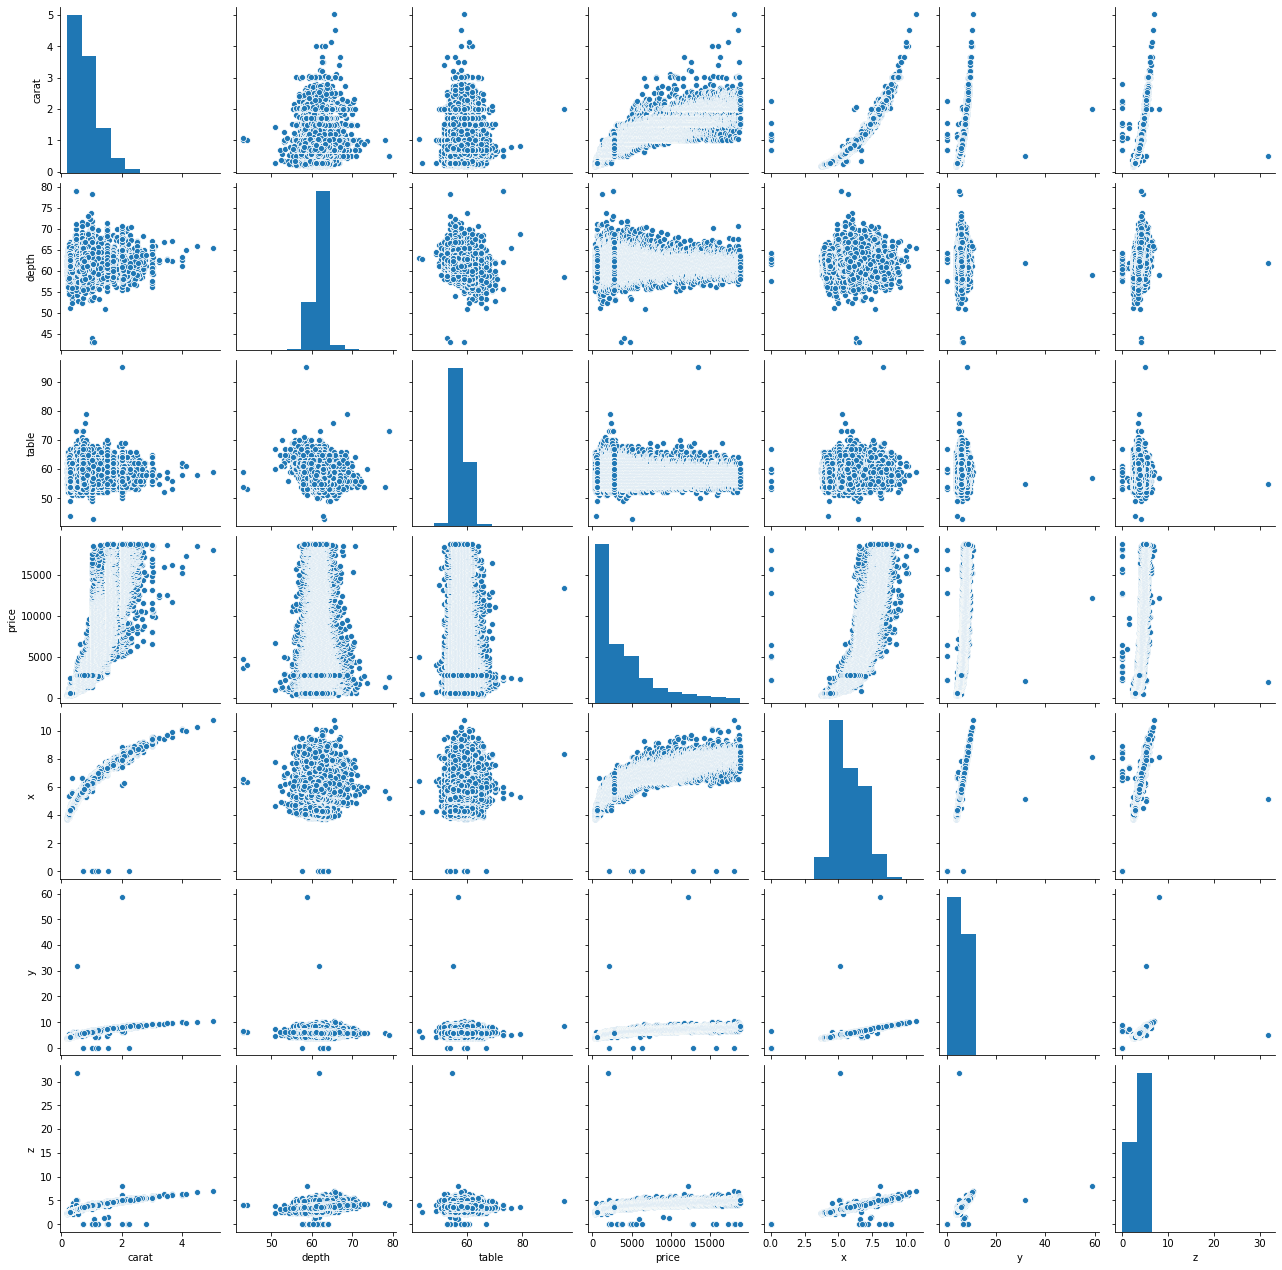

In [8]:
sns.pairplot(df)

### 1.3 Check Missing Values

In [9]:
df.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

Values of 0 in x, y, z is not possible, because they are length, width, and depth according to the description. We'll check how many rows have that condition.

In [10]:
df[['x','y','z']] = df[['x', 'y', 'z']].replace(0, np.NaN)

In [11]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

Since our dataset is big, dropping 20 rows shouldn't cost us.

In [12]:
df.dropna(inplace=True)

### 1.4 Categorical Data

Text(0.5, 1.0, 'Diamond Clarity vs Price Boxplot')

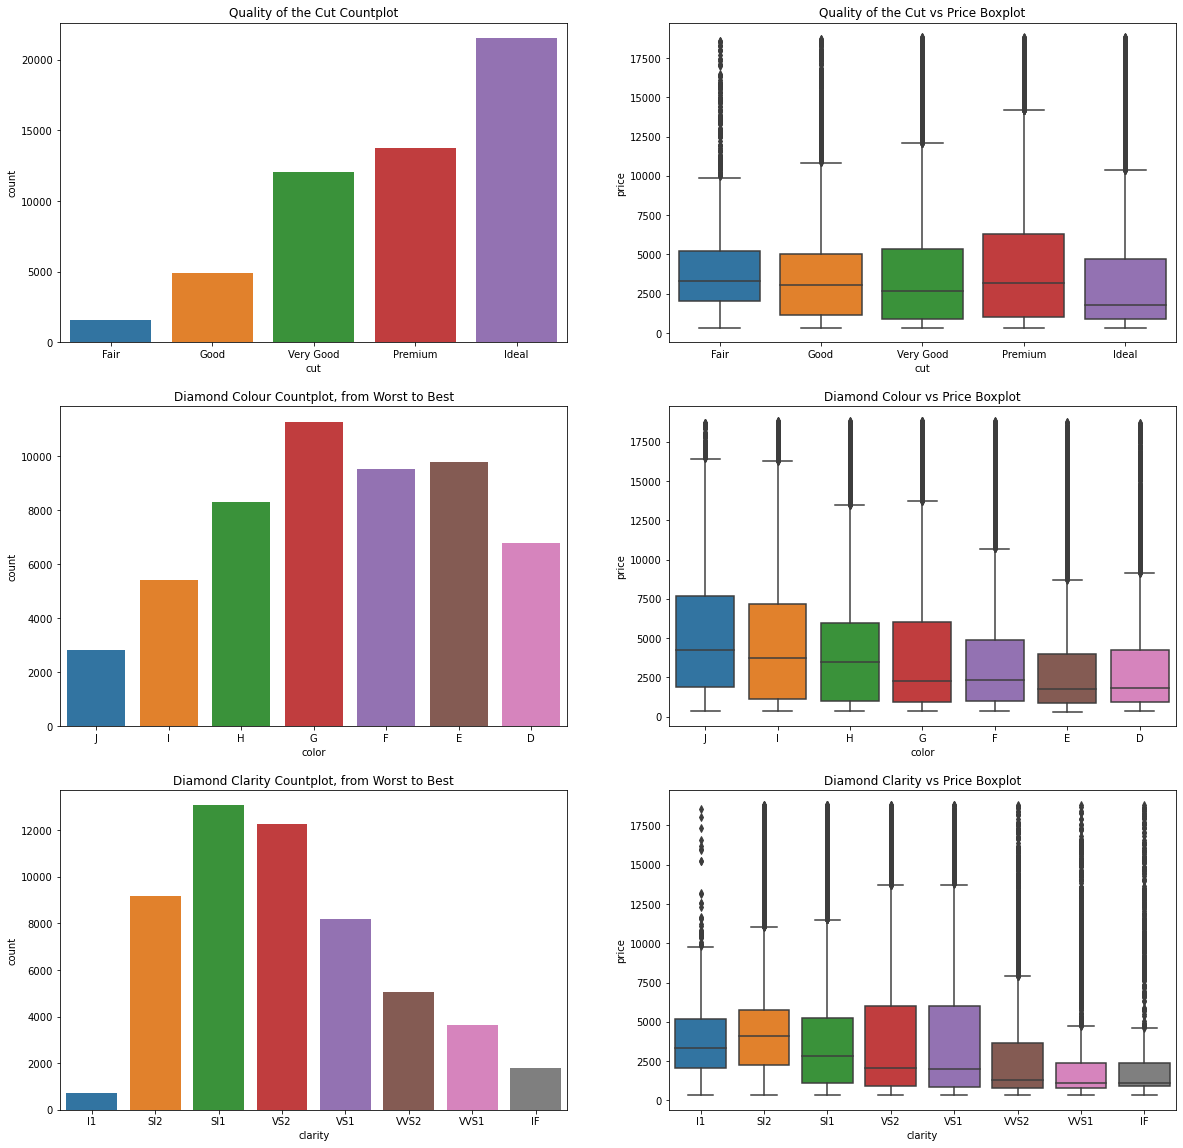

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(321)
sns.countplot(x='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Quality of the Cut Countplot')

plt.subplot(322)
sns.boxplot(x='cut', y='price', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Quality of the Cut vs Price Boxplot')

plt.subplot(323)
sns.countplot(x='color', data=df, order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title('Diamond Colour Countplot, from Worst to Best')

plt.subplot(324)
sns.boxplot(x='color', y='price', data=df, order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title('Diamond Colour vs Price Boxplot')

plt.subplot(325)
sns.countplot(x='clarity', data=df, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Diamond Clarity Countplot, from Worst to Best')

plt.subplot(326)
sns.boxplot(x='clarity', y='price', data=df, order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Diamond Clarity vs Price Boxplot')

Overall, median prices are very low compared to the the highest price values for all the categories in colors, cut and clarity (and it looks like a gallery of swords). Next, we'll convert the categorical data into numerical data using one hot encoding.

For reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [14]:
clean_df = pd.get_dummies(df)
clean_df.head()

carat  depth  table  price     x     y     z  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0         0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0         0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31         0         1   
3   0.29   62.4   58.0    334  4.20  4.23  2.63         0         0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75         0         1   

   cut_Ideal  cut_Premium  cut_Very Good  color_D  color_E  color_F  color_G  \
0          1            0              0        0        1        0        0   
1          0            1              0        0        1        0        0   
2          0            0              0        0        1        0        0   
3          0            1              0        0        0        0        0   
4          0            0              0        0        0        0        0   

   color_H  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  \
0        0        0        0           0           0            0   
1        0        0        0           0           0            1   
2        0        0        0           0           0            0   
3        0        1        0           0           0            0   
4        0        0        1           0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  
2            0            1            0             0             0  
3            0            0            1             0             0  
4            1            0            0             0             0

### 1.5 Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
numericals = pd.DataFrame(StandardScaler().fit_transform(clean_df[['carat','depth','x','y','z','table']]),
                        columns=['carat','depth','x','y','z','table'],
                        index=clean_df.index)

In [16]:
clean_df[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]
clean_df.head()

carat     depth     table  price         x         y         z  \
0 -1.198204 -0.174203 -1.099725    326 -1.591573 -1.539219 -1.580084   
1 -1.240417 -1.361090  1.585988    326 -1.645173 -1.662014 -1.750896   
2 -1.198204 -3.385781  3.376463    327 -1.502241 -1.460280 -1.750896   
3 -1.071566  0.454149  0.243131    334 -1.368242 -1.319943 -1.295396   
4 -1.029353  1.082501  0.243131    335 -1.243176 -1.214690 -1.124583   

   cut_Fair  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_D  \
0         0         0          1            0              0        0   
1         0         0          0            1              0        0   
2         0         1          0            0              0        0   
3         0         0          0            1              0        0   
4         0         1          0            0              0        0   

   color_E  color_F  color_G  color_H  color_I  color_J  clarity_I1  \
0        1        0        0        0        0        0           0   
1        1        0        0        0        0        0           0   
2        1        0        0        0        0        0           0   
3        0        0        0        0        1        0           0   
4        0        0        0        0        0        1           0   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0           0            0            1            0            0   
1           0            1            0            0            0   
2           0            0            0            1            0   
3           0            0            0            0            1   
4           0            0            1            0            0   

   clarity_VVS1  clarity_VVS2  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

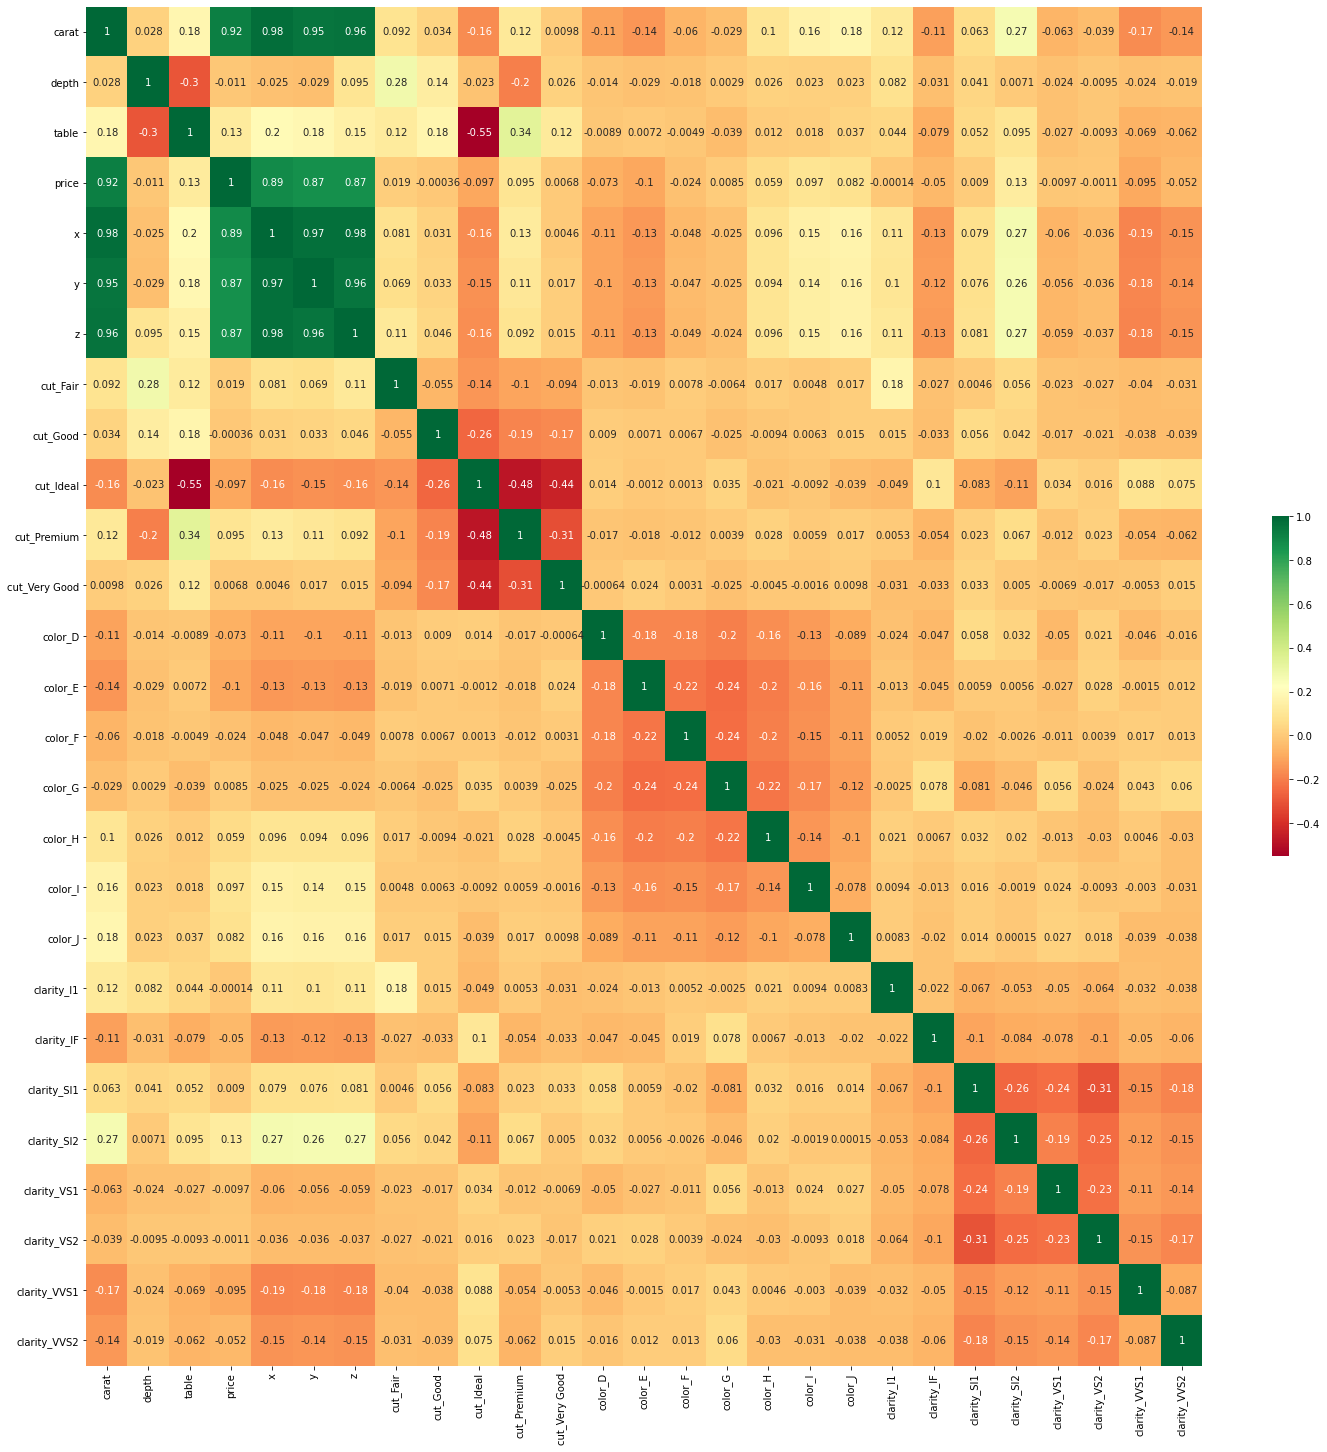

In [17]:
plt.figure(figsize=(25,25))
sns.heatmap(clean_df.corr(), annot=True, cmap='RdYlGn', cbar_kws={'shrink': .25})

It's pretty cool that the stats are still same even after standardization.

### 1.6 Split into Train and Test Data

In [18]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(['price'], axis=1)
y = clean_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

## 2. Model Training

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Reference for the metrics I use: https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f

### 2.1 Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy: ', lr.score(X_test, y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R Squared: ', r2_score(y_test, y_pred))

Accuracy:  0.9216700049231721
Mean Absolute Error:  733.5299925732875
Mean Squared Error:  1236679.2708149399
R Squared:  0.9216700049231721


### 2.2 Ridge and Lasso Regression

In [25]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('Accuracy: ', ridge.score(X_test, y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R Squared: ', r2_score(y_test, y_pred))

Accuracy:  0.9216661753597207
Mean Absolute Error:  733.5416630107638
Mean Squared Error:  1236739.7322222444
R Squared:  0.9216661753597207


In [26]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('Accuracy: ', lasso.score(X_test, y_test))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R Squared: ', r2_score(y_test, y_pred))

Accuracy:  0.9216016627043966
Mean Absolute Error:  732.0438147146006
Mean Squared Error:  1237758.2623966236
R Squared:  0.9216016627043966


Here, the optimal accuracy is by using Linear Regression. Thank you for reading this notebook :)